In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Aproximación de funciones por el método de mínimos cuadrados

Se utiliza cuando la información contiene errores significativos; por ejemplo, cuando los datos provienen de experimentos. Es por ello que no tiene sentido hacer pasar un polinomio por los puntos, lo mejor es que pase cerca de ellos.

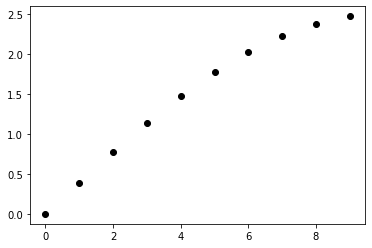

In [2]:
x = np.arange(10)
y = 2.5*np.sin(x/20*np.pi)
yerr = np.linspace(0.05,0.2,10)
plt.plot(x,y,"ko")
plt.show()

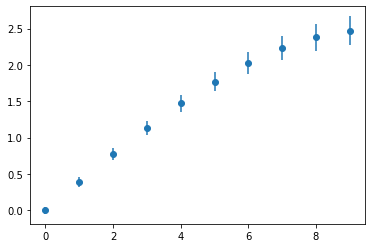

In [3]:
x = np.arange(10)
y = 2.5*np.sin(x/20*np.pi)
yerr = np.linspace(0.05,0.2,10)
plt.errorbar(x,y,yerr=yerr,fmt='o')
plt.show()

¿Cuántas curvas pueden pasar entre los puntos? Pues pueden pasar un número infinito de curvas. El método de mínimos cuadrados busca determinar la mejor curva, minimizando la sumatoria de las distancias entre el valor de la función de aproximación $p(x_i)$ y el valor de la función $f(x_i)$ de los datos.

$$\sum_{i=1}^{m}\left|p(x_i)-f(x_i) \right|^2 = \sum_{i=1}^{m}d_i^2=\text{mínimo}$$

Si se utiliza un polinomio de grado uno

$$p(x)=a_0 + a_1x$$

para aproximar la función tabulada, el problema queda definido como

$$\sum_{i=1}^m\left|a_0+a_1x_i-f(x_i)\right|^2$$

Entonces, del total de polinomios que pasan entre los puntos, se va a seleccionar aquél cuyos coeficientes $a_0$ y $a_1$ minimicen la sumatoria de la ecuación anterior.

Para minimizar la sumatoria, se deriva parcialmente respectoa a cada una de las variables, $a_0$ y $a_1$, y se iguala a cero cada derivada.

$$\dfrac{\partial}{\partial a_0}\left[\sum_{i=1}^m\left|a_0+a_1x_i-f(x_i)\right|^2\right]=\sum_{i=1}^m 2 \left[a_0+a_1x_i-f(x_i)\right] = 0$$

$$\dfrac{\partial}{\partial a_1}\left[\sum_{i=1}^m\left|a_0+a_1x_i-f(x_i)\right|^2\right]=\sum_{i=1}^m 2 \left[a_0+a_1x_i-f(x_i)\right]x_i = 0$$



Desarrollando las sumatorias

$$[a_0+a_1x_1-f(x_1)]+[a_0+a_1x_2-f(x_2)]+\ldots+[a_0+a_1x_m-f(x_m)]=0$$

$$[a_0+a_1x_1^2-f(x_1)x_1]+[a_0+a_1x_2^2-f(x_2)x_2]+\ldots+[a_0+a_1x_m^2-f(x_m)x_m]=0$$

simplificando

$$ma_0 + a_1 \sum_{i=1}^m x_i = \sum_{i=1}^m f(x_i)$$

$$m\sum_{i=1}^m x_i + a_1 \sum_{i=1}^m x_i^2= \sum_{i=1}^m f(x_i) x_i$$

Resolviendo

$$a_0 = \dfrac{[\sum_{i=1}^m f(x_i)][\sum_{i=1}^m x_i^2]-[\sum_{i=1}^m x_i][\sum_{i=1}^m f(x_i)x_i] }{m \sum_{i=1}^m x_i^2-[\sum_{i=1}^m x_i]^2}$$

$$a_1 = \dfrac{m\sum_{i=1}^m f(x_i)x_i-[\sum_{i=1}^m f(x_i)][\sum_{i=1}^m x_i]}{m\sum_{i=1}^m x_i^2 - [\sum_{i=1}^m x_i]^2}$$

**Ejemplo**: En la siguiente tabla se presentan los alargamientos de un resorte $(m)$, correspondientes a fuerzas $(kgf)$ de diferente magnitud que lo deforman.

<table class="egt">
  <tr><td>Puntos </td> <td>$0$</td><td>$1$</td><td>$2$</td><td>$3$</td><td>$4$</td></tr>
  <tr><td>$Fuerza$</td><td>$0$</td><td>$2$</td><td>$3$</td><td>$6$</td><td>$7$</td></tr>
  <tr><td>$Longitud$</td><td>$0.120$</td><td>$0.153$</td><td>$0.170$</td><td>$0.225$</td><td>$0.260$</td></tr>
</table>

Determine por mínimos cuadrados el mejor polinomio de primer grado que represente la función dada.

In [4]:
Fxi = np.array([0,2,3,6,7])    # Variable independiente, xi 
Lyi = np.array([0.120, 0.153, 0.170, 0.225, 0.260])    # Variable dependiente, f(xi)


In [5]:
SumFxi = np.sum(Fxi)
SumLyi = np.sum(Lyi)
SumFxi_pow2 = np.sum(Fxi**2)
SumFxiLyi = np.sum(Fxi*Lyi)
m = np.shape(Fxi)[0]
# m = len(Fxi)   # Tambien se puede hacer de esta forma

In [6]:
a0 = (SumLyi*SumFxi_pow2 - SumFxi*SumFxiLyi)/(m*SumFxi_pow2-SumFxi**2)
a0

0.11563855421686738

In [7]:
a1 = (m*SumFxiLyi - SumLyi*SumFxi)/(m*SumFxi_pow2-SumFxi**2)
a1

0.019433734939759053

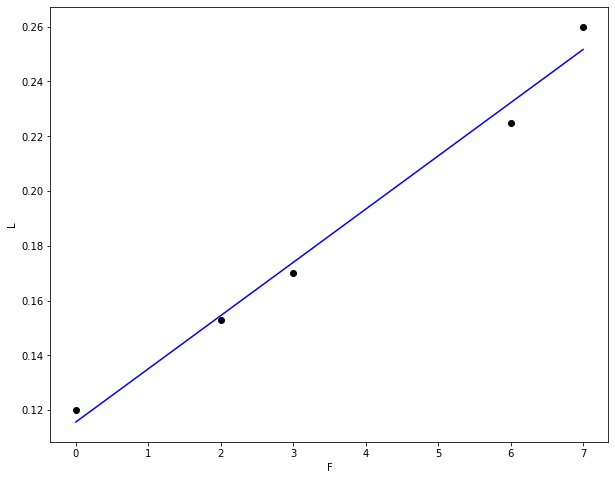

In [8]:
xinter = np.linspace(0,7,endpoint=True)
plt.figure(figsize=(10,8))
plt.plot(Fxi,Lyi,"ko")
plt.plot(xinter,a0+a1*xinter,"b-")
plt.xlabel("F")
plt.ylabel("L")
plt.show()

**Otras formas de resolver**

$$\begin{bmatrix}
x_{11} & x_{12}& \ldots & x_{1n}\\
x_{21} & x_{22}& \ldots & x_{2n}\\
\vdots & \vdots& \ddots & \vdots\\
x_{m1} & x_{m2}& \ldots & x_{mn}
\end{bmatrix}\begin{bmatrix}
\beta_1\\
\beta_2\\
\vdots\\
\beta_n\\
\end{bmatrix}=\begin{bmatrix}
y_1\\
y_2\\
\vdots\\
y_m
\end{bmatrix}$$

donde $X$ es la matriz de Vandermonde $(V)$ de la variable x.

$$V = \begin{bmatrix}
1 & \alpha_1 & \alpha_1^2 &\ldots & \alpha_1^n\\
1 & \alpha_2 & \alpha_2^2 &\ldots & \alpha_2^n\\
1 & \alpha_3 & \alpha_3^2 &\ldots & \alpha_3^n\\
\vdots & \vdots& \vdots &\ddots & \vdots\\
1 & \alpha_n & \alpha_n^2 &\ldots & \alpha_n^n\\
\end{bmatrix}$$

Para obtener los coeficientes, hay que resolver el sistema anterior de la forma siguiente:

$$\boldsymbol{\beta} = (X^TX)^{-1}X^T\boldsymbol{y}$$

In [9]:
X = np.vstack([Fxi, np.ones(len(Fxi))]).T
X

array([[0., 1.],
       [2., 1.],
       [3., 1.],
       [6., 1.],
       [7., 1.]])

In [10]:
beta = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Lyi))
beta

array([0.01943373, 0.11563855])

Utilizando el método _lstsqs_ de numpy

In [11]:
np.linalg.lstsq(X,Lyi,rcond=None)[0]

array([0.01943373, 0.11563855])

Utilizando el método _polyfit_ de numpy para ajustar a un polinomio de primer grado de la forma

$$y = mx+c$$


In [12]:
m,c = np.polyfit(Fxi,Lyi,1)
print (m,c)

0.01943373493975904 0.11563855421686749


## Para polinomios de segundo grado 

$$p_2(x)=a_0 + a_1x_1 + a_2x^2$$

se tiene que minimizar

$$\sum_{i=1}^m\left[a_0 + a_1x_i + a_2x_i^2 - f(x_i)\right]^2$$

Los parámetros $a_0, a_1$ y $a_2$ se obtienen al resolver el sistema de ecuaciones que resulta de derivar parcialmente e igual a cero la función por minimizar con respecto a cada uno.

$$\begin{align*}
ma_0 + a_1\sum_{i=1}^m x_i + a_2 \sum_{i=1}^m x_i^2
&= \sum_{i=1}^m f(x_i)\\
a_0\sum_{i=1}^m x_i + a_1\sum_{i=1}^m x_i^2 + a_2\sum_{i=1}^m x_i^3 &= \sum_{i=1}^m f(x_i)x_i\\
a_0\sum_{i=1}^m x_i^2 + a_1\sum_{i=1}^m x_i^3 + a_2\sum_{i=1}^m x_i^4 &= \sum_{i=1}^m f(x_i)x_i^2
\end{align*}$$

**Ejemplo**: El calor específico $\mathrm{C_p(cal/k gmol)}$ del $\mathrm{Mn_3O_4}$ varía con la temperatura, $\mathrm{T(K)}$, de acuerdo a la siguiente tabla.

<table class="egt">
  <tr><td>Punto </td> <td>$0$</td><td>$1$</td><td>$2$</td><td>$3$</td><td>$4$</td><td>$5$</td></tr>
  <tr><td>$T$</td><td>$280$</td><td>$650$</td><td>$1000$</td><td>$1200$</td><td>$1500$</td><td>$1700$</td></tr>
  <tr><td>$C_p$</td><td>$32.7$</td><td>$45.4$</td><td>$52.15$</td><td>$53.7$</td><td>$52.9$</td><td>$50.3$</td></tr>
</table>

Aproxime esta información con un polinomio por el método de minimos cuadrados.

In [13]:
Txi = np.array([280, 650, 1000, 1200, 1500, 1700])    # xi
Cpfxi = np.array([32.7, 45.4, 52.15, 53.7, 52.9, 50.3])    #f(xi)


In [14]:
SumTxi = np.sum(Txi)
SumCpfxi = np.sum(Cpfxi)
SumTxi_pow2 = np.sum(Txi**2)
SumTxi_pow3 = np.sum(Txi**3)
SumTxi_pow4 = np.sum(Txi**4)
SumTxiCpfxi = np.sum(Txi*Cpfxi)
SumTxiCpfxi2 = np.sum(Cpfxi*Txi**2)
m = len(Txi)

In [15]:
print(SumTxi,SumCpfxi,SumTxi_pow2,SumTxi_pow3,SumTxi_pow4,SumTxiCpfxi,SumTxiCpfxi2)

6330 287.15 8080900 11312577000 16672852810000 320116.0 415615180.0


Con los datos anteriores se obtiene el siguiente sistema

$$\begin{bmatrix}
6 & 6330 & 8.08E6 \\
6330 & 8.08E6 & 11.30E9\\
8.08E6 & 11.31E9 & 166.72E11
\end{bmatrix}\begin{bmatrix}
a_0\\
a_1\\
a_2
\end{bmatrix} =\begin{bmatrix}
287.15\\
320116\\
415.61E6
\end{bmatrix} $$

In [16]:
A = np.array([[6, 6330, 8.08e6],
              [6330, 8.08e6, 11.30e9],
              [8.08e6, 11.31e9, 166.72e11]])
b = np.array([287.15, 320116, 415.61e6])

In [17]:
a0,a1,a2= np.linalg.solve(A,b)
print(a0,a1,a2)


20.90498330522697 0.04967713613367377 -1.8902991529395654e-05


In [18]:
CpdeT = np.poly1d([a2,a1,a0]) 
print(CpdeT)

           2
-1.89e-05 x + 0.04968 x + 20.9


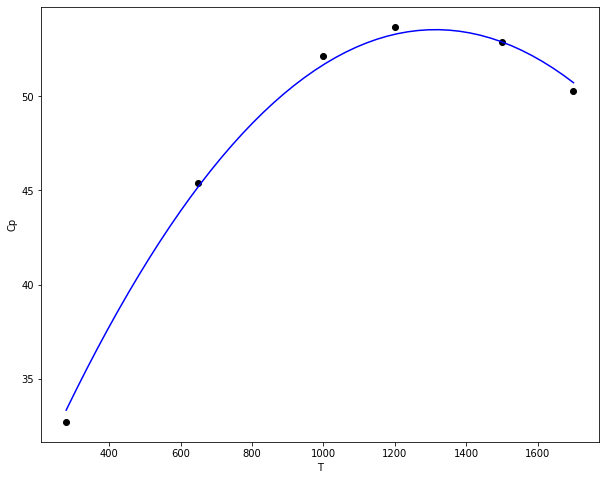

In [19]:
xinter = np.linspace(280,1700,endpoint=True)
plt.figure(figsize=(10,8))
plt.plot(Txi,Cpfxi,"ko")
plt.plot(xinter,CpdeT(xinter),"b-")
plt.xlabel("T")
plt.ylabel("Cp")
plt.show()

**¡Cuidado!** al utilizar el método _polyfit_ de numpy

In [20]:
np.polyfit(Txi,Cpfxi,2)

array([-2.08787347e-05,  5.37277016e-02,  1.92954360e+01])

In [21]:
CpdeT2 = np.poly1d(np.polyfit(Txi,Cpfxi,2))
print(CpdeT2)

            2
-2.088e-05 x + 0.05373 x + 19.3


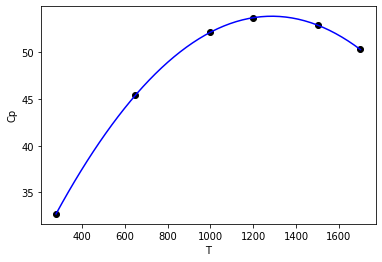

In [22]:
plt.plot(Txi,Cpfxi,"ko")
plt.plot(xinter,CpdeT2(xinter),"b-")
plt.xlabel("T")
plt.ylabel("Cp")
plt.show()

## Para polinomios de grado $n$

La función a minimizar es

$$\sum_{i=1}^m\left[a_0 + a_1x_i + a_2x_i^2+\ldots+a_nx_i^n - f(x_i)\right]^2$$

Se llega al siguiente sistema lineal

$$\begin{array}
ma_0 & + & a_1\sum x & + & a_2\sum x^2 & + \ldots +&a_n\sum x^n &= \sum  \gamma\\
a_0 \sum x& + & a_1\sum x^2 & + & a_2\sum x^3 & + \ldots +&a_n\sum x^{n+1} &= \sum  x\gamma\\
a_0 \sum x^2& + & a_1\sum x^3 & + & a_2\sum x^4 & + \ldots +&a_n\sum x^{n+2} &= \sum  x^2\gamma\\
\vdots&  & &  &  &  \vdots & &\\
a_0 \sum x^n& + & a_1\sum x^{n+1} & + & a_2\sum x^{n+2} & + \ldots +&a_n\sum x^{n+n} &= \sum  x^n\gamma\\
\end{array}$$

## Aproximación multilineal con mínimos cuadrados

Se utiliza cuando se tiene funciones lineales de más de una variable $f(u,v,z)$ 

$$\gamma = a_0 + a_1 u + a_2 v + a_3 z$$

Por ejemplo, si se tienen los siguientes datos:

<table class="egt">
  <tr><td>Puntos</td><td>$u$</td><td>$v$</td><td>$z$</td><td>$\gamma$</td></tr>
  <tr><td>$1$</td><td>$u_1$</td><td>$v_1$</td><td>$z_1$</td><td>$f(u_1,v_1,z_1)$</td></tr>
  <tr><td>$2$</td><td>$u_2$</td><td>$v_2$</td><td>$z_2$</td><td>$f(u_2,v_2,z_2)$</td></tr>
  <tr><td>$3$</td><td>$u_3$</td><td>$v_3$</td><td>$z_3$</td><td>$f(u_3,v_3,z_3)$</td></tr>
  <tr><td>$\vdots$</td><td>$\vdots$</td><td>$\vdots$</td><td>$\vdots$</td><td>$\vdots$</td></tr>
  <tr><td>$m$</td><td>$u_m$</td><td>$v_m$</td><td>$z_m$</td><td>$f(u_m,v_m,z_m)$</td></tr>
</table>


Al aplicar el método de mínimos cuadrados, se tiene

$$\begin{align*}
\dfrac{\partial}{\partial a_0}\sum_{i=1}^m[(a_0+a_1u_i+a_2v_i+a_3z_i)-\gamma_i]^2 & = 2\sum_{i=1}^m ((a_0+a_1u_i+a_2v_i+a_3z_i)-\gamma_i) = 0\\
\dfrac{\partial}{\partial a_1}\sum_{i=1}^m[(a_0+a_1u_i+a_2v_i+a_3z_i)-\gamma_i]^2 & = 2\sum_{i=1}^m ((a_0+a_1u_i+a_2v_i+a_3z_i)-\gamma_i)u_i = 0\\
\dfrac{\partial}{\partial a_2}\sum_{i=1}^m[(a_0+a_1u_i+a_2v_i+a_3z_i)-\gamma_i]^2 & = 2\sum_{i=1}^m ((a_0+a_1u_i+a_2v_i+a_3z_i)-\gamma_i)v_i = 0\\
\dfrac{\partial}{\partial a_3}\sum_{i=1}^m[(a_0+a_1u_i+a_2v_i+a_3z_i)-\gamma_i]^2 & = 2\sum_{i=1}^m ((a_0+a_1u_i+a_2v_i+a_3z_i)-\gamma_i) z_i= 0\\
\end{align*}$$

Las ecuaciones anteriores forman un sistema algebraico lineal

$$\begin{array}{ccccccccc}
m a_0 & + & a_1\sum u & + & a_2\sum v & + a_3\sum z &= \sum  \gamma\\
a_0\sum u & + & a_1\sum u^2 & + & a_2\sum uv & + a_3\sum uz &= \sum  u\gamma\\
a_0\sum v & + & a_1\sum vu & + & a_2\sum v^2 & + a_3\sum vz &= \sum  v\gamma\\
a_0\sum z & + & a_1\sum zu & + & a_2\sum zv & + a_3\sum z^2 &= \sum  z\gamma\\
\end{array}$$

**Ejemplo**: A partir del estudio experimental acerca de la estabilización de arcilla muy plástica, pudo observarse que el contenido de agua para moldeo con densidad óptima dependía linealmente de los porcentajes de cal y puzolana mezclados con la arcilla. Se obtuvieron así los siguientes resultados.

<table class="egt">
  <tr><td>Agua(%)</td><td>Cal(%)</td><td>Puzolana(%)</td></tr>
  <tr><td>$\gamma$</td><td>$u$</td><td>$v$</td></tr>
  <tr><td>$27.5$</td><td>$2.0$</td><td>$18.0$</td></tr>
  <tr><td>$28.0$</td><td>$3.5$</td><td>$16.5$</td></tr>
  <tr><td>$28.8$</td><td>$4.5$</td><td>$10.5$</td></tr>
  <tr><td>$29.1$</td><td>$2.5$</td><td>$2.5$</td></tr>
  <tr><td>$30.0$</td><td>$8.5$</td><td>$9.0$</td></tr>
  <tr><td>$31.0$</td><td>$10.5$</td><td>$4.5$</td></tr>
  <tr><td>$32.0$</td><td>$13.5$</td><td>$1.5$</td></tr>
</table>

Ajuste los datos a una ecuación de la forma

$$\gamma = a_0 + a_1 u + a_2 v$$

El sistema a resolver es

$$\begin{array}{ccccccccc}
m a_0     & + & a_1\sum u & + & a_2\sum v &=& \sum  \gamma\\
a_0\sum u & + & a_1\sum u^2 & + & a_2\sum uv &=& \sum  u\gamma\\
a_0\sum v & + & a_1\sum vu & + & a_2\sum v^2 &=& \sum  v\gamma\\
\end{array}$$

In [23]:
u = np.array([2.0, 3.5, 4.5, 2.5, 8.5, 10.5, 13.5])
v = np.array([18.0, 16.5, 10.5, 2.5, 9.0, 4.5, 1.5])
gamma = np.array([27.5, 28.0, 28.8, 29.1, 30.0, 31.0, 32.0])

In [24]:
Sumu = np.sum(u)
Sumv = np.sum(v)
Sumgamma = np.sum(gamma)
Sumu2 = np.sum(u**2)
Sumv2 = np.sum(v**2)
Sumuv = np.sum(u*v)
Sumugamma = np.sum(u*gamma)
Sumvgamma = np.sum(v*gamma)

In [25]:
A = np.array([[len(u), Sumu, Sumv],[Sumu,Sumu2,Sumuv],[Sumv,Sumuv,Sumv2]])
b = np.array([Sumgamma, Sumugamma,Sumvgamma])

In [26]:
a0,a1,a2 = np.linalg.solve(A,b)
print(a0,a1,a2)

28.691713508833963 0.2569392657261652 -0.09606818431224294


## Ajuste de funciones genéricas, $f(x)$, por mínimos cuadrados

Se utiliza el método _leastsq_ del paquete **optimize** de la biblioteca _scipy_.


In [27]:
from scipy.optimize import leastsq

# Datos experimentales
T = np.array([280, 650, 1000, 1200, 1500, 1700])    # xi
Cp = np.array([32.7, 45.4, 52.15, 53.7, 52.9, 50.3])    #f(xi)

# Construir una función objetivo
def funcion_objetivo(p,x,y):
  error = y - (p[2]*x**2 + p[1]*x + p[0])
  return error


# Valores iniciales con los que se inicia la búsqueda para p[2]*x**2 + p[1]*x + p[0] 
p0 = [1, 1, 10]

"""
En el método leastsq(); el primer parámetro es la funcion objetivo (de residuos), 
luego los valores iniciales y una tupla con los argumentos de la funcion objetivo,
en este caso, T y Cp en ese orden.
"""

ajuste = leastsq(funcion_objetivo,p0,args=(T,Cp))

In [28]:
print(ajuste)

(array([ 1.92954360e+01,  5.37277016e-02, -2.08787347e-05]), 3)


In [29]:
a0,a1,a2 = ajuste[0]
print(a0,a1,a2)

19.295435965895717 0.053727701608657474 -2.087873466794246e-05


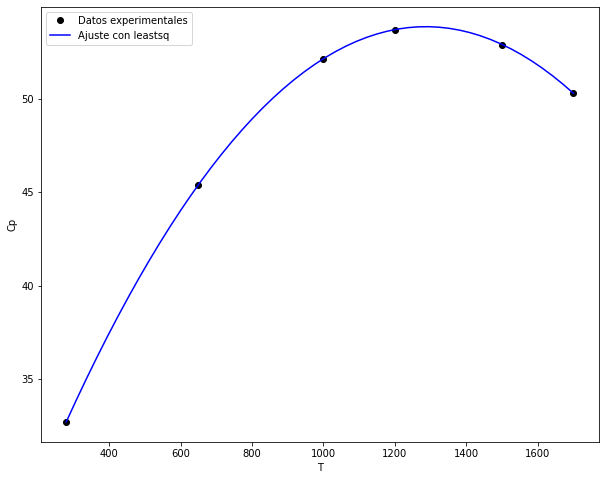

In [30]:
xinter = np.linspace(280,1700,endpoint=True)
plt.figure(figsize=(10,8))
plt.plot(T,Cp,"ko")
plt.plot(xinter,a0 + a1*xinter + a2*xinter**2,"b-")
plt.xlabel("T")
plt.ylabel("Cp")
plt.legend(('Datos experimentales', 'Ajuste con leastsq'))
plt.show()

**Otro ejemplo**


In [31]:
from scipy import random
"""
Se van a generar datos artificiales a partir de una función fx, posteriormente a 
éstos datos se le va a agregar un "ruido" para simular el error experimental
(medida), añadiendole un valor aleatorio.
"""
x = np.arange(0,0.1,0.003)
A, k, theta = 10.0,33.3, np.pi/5.0
fx = A*np.sin(2*np.pi*k*x + theta)
datos_exp = fx + 2*random.randn(len(x))

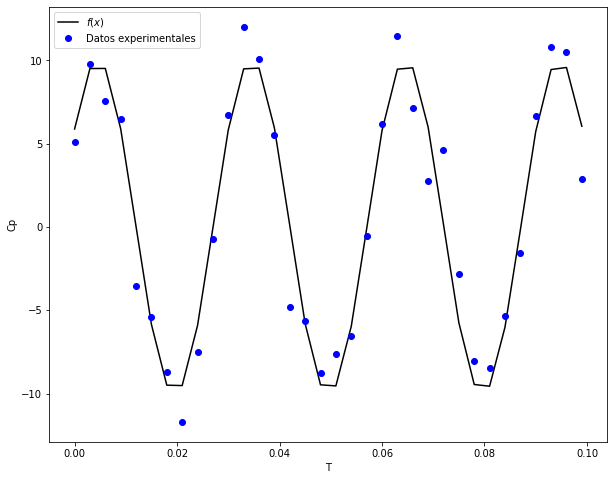

In [32]:
plt.figure(figsize=(10,8))
plt.plot(x,fx,"k-")
plt.plot(x,datos_exp,"bo")
plt.xlabel("T")
plt.ylabel("Cp")
plt.legend((r'$f(x)$', 'Datos experimentales'))
plt.show()

In [33]:
"""
Con leastsq se va a ajustar los datos experimenrales (datos_exp) a la función
f(x) = A*sin(2*pi*k*x + theta)
"""
# Función objetivo
def funcion_objetivo(p,x,y):
  A,k,theta = p
  return y -  A*np.sin(2*np.pi*k*x + theta)

# Valores iniciales
p0 = [8.0,30.0,np.pi/3]

# Se llama a leastsq para realizar el ajuste

p = leastsq(funcion_objetivo, p0, args=(x,datos_exp))[0]

In [34]:
# A, k, theta = 10.0,33.3, np.pi/5.0
print(p)

[ 9.73858084 33.22724441  0.68627561]


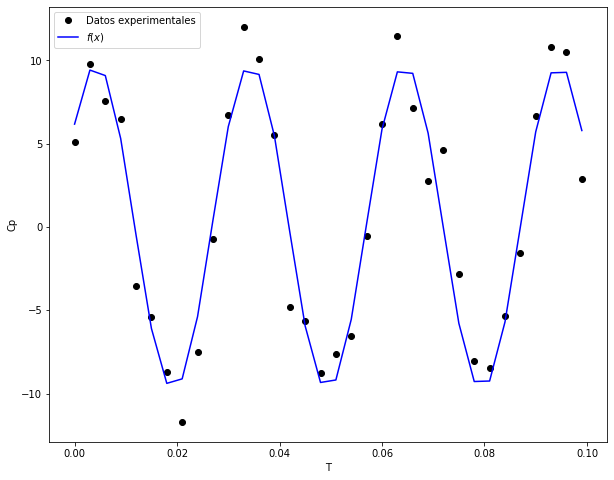

In [35]:
def funcion(x, p):
    return p[0]*np.sin(2*np.pi*p[1]*x + p[2])

plt.figure(figsize=(10,8))
plt.plot(x,datos_exp,"ko")
plt.plot(x,funcion(x,p),"b-")
plt.xlabel("T")
plt.ylabel("Cp")
plt.legend(('Datos experimentales',r'$f(x)$' ))
plt.show()

# Regresión lineal con _scikit-learn_

[_scikit-learn_](https://scikit-learn.org/stable/) es una biblioteca para el aprendizaje automático (machine learning).

**Ejemplo**: Para este ejemplo se van a generar datos artificiales a partir de una función $f(x)$, posteriormente a éstos datos se le va a agregar un "ruido" para simular el error experimental
(medida), añadiendole un ruido gausiano $(N(0,0.2))$.

La función es 

$$y = 0.1x + 1.25 + N(0,0.2)$$

Regresión lineal con una variable

$$y = b + wx$$

para cuando se tiene un dato con $N$ variables (regresión lineal múltivariable), se designará a $X$ como el dato y con $W$ a los parámetros.

$$\begin{align*}
X &= [x_0, x_1, x_2,\ldots,x_N]\\
W &= [w_0, w_1, w_2,\ldots,w_N]
\end{align*}$$

Haciendo $x_0=1$ y $w_0=b$, se tiene

$$y = w_0x_0 + w_1x_1 = b + wx $$

Para el caso general:

$$y = WX$$

En la matriz $X$:

> $M$ filas: cada fila es un dato (variable).

> $N$ columnas: cada columna es atributo relevante

In [36]:
# Importamos el modulo LinearRegression
from sklearn.linear_model import LinearRegression

In [37]:
def f(x):    # Creamos la función f(x)
  np.random.seed(42)
  return 0.1*x + 1.25 + 0.2*np.random.rand(x.shape[0])

In [38]:
x = np.arange(0,20,0.5)    # creamos un arreglo para la variable independiente x

In [39]:
y = f(x)
y

array([1.32490802, 1.49014286, 1.49639879, 1.5197317 , 1.48120373,
       1.5311989 , 1.56161672, 1.77323523, 1.770223  , 1.84161452,
       1.7541169 , 1.99398197, 2.01648853, 1.94246782, 1.98636499,
       2.0366809 , 2.11084845, 2.20495129, 2.236389  , 2.25824583,
       2.37237058, 2.32789877, 2.40842893, 2.47327237, 2.541214  ,
       2.65703519, 2.58993476, 2.70284689, 2.76848291, 2.70929008,
       2.87150897, 2.83410482, 2.86301032, 3.08977711, 3.14312641,
       3.16167947, 3.11092275, 3.11953442, 3.28684661, 3.2880305 ])

In [40]:
len(y)

40

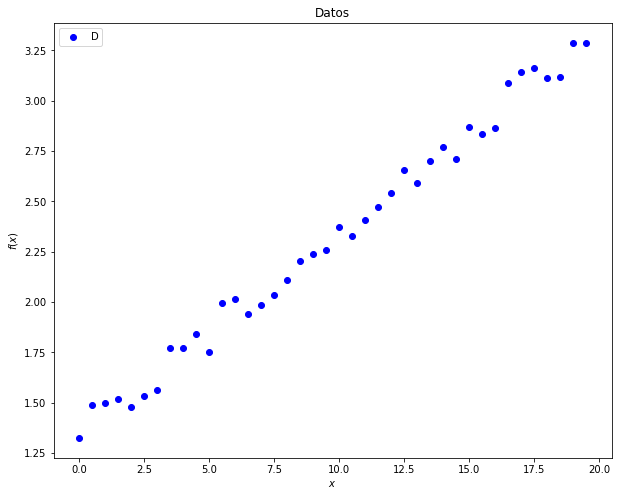

In [41]:
plt.figure(figsize=(10,8))
plt.scatter(x,y,label='data', color='blue')
plt.title('Datos')
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.legend(('Datos experimentales'))
plt.show()

In [42]:
x.shape

(40,)

In [43]:
x.reshape(len(x),1)

array([[ 0. ],
       [ 0.5],
       [ 1. ],
       [ 1.5],
       [ 2. ],
       [ 2.5],
       [ 3. ],
       [ 3.5],
       [ 4. ],
       [ 4.5],
       [ 5. ],
       [ 5.5],
       [ 6. ],
       [ 6.5],
       [ 7. ],
       [ 7.5],
       [ 8. ],
       [ 8.5],
       [ 9. ],
       [ 9.5],
       [10. ],
       [10.5],
       [11. ],
       [11.5],
       [12. ],
       [12.5],
       [13. ],
       [13.5],
       [14. ],
       [14.5],
       [15. ],
       [15.5],
       [16. ],
       [16.5],
       [17. ],
       [17.5],
       [18. ],
       [18.5],
       [19. ],
       [19.5]])

In [44]:
# Enviamos los datos (x,y) al método fit para que aprenda de ellos

regresion_lineal=LinearRegression()    # creamos una instancia de LinearRegression

regresion_lineal.fit(x.reshape(-1,1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
w = regresion_lineal.coef_[0]
w

0.09975416840868817

In [46]:
b = regresion_lineal.intercept_
b

1.3436499832821553

In [47]:
print(np.poly1d([w,b]))

 
0.09975 x + 1.344


El método _fit_ estimó $0.09975$ para $w$ y $1.344$ para $b$, la regresión queda como 

$$y=0.09975x + 1.344 $$

La función que generó los datos es:

$$y = 0.1x + 1.25 $$

## Prediciendo 

Interesa saber qué valor de $y$ corresponde para $x=5$

In [48]:
prediccion = regresion_lineal.predict(np.array([[5]]))
prediccion

array([1.84242083])

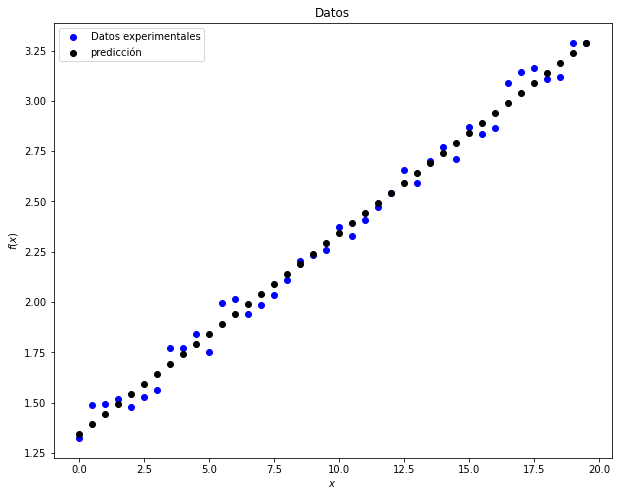

In [49]:
plt.figure(figsize=(10,8))
plt.scatter(x,y,label='data', color='blue')
plt.scatter(x,regresion_lineal.predict(x.reshape(-1,1)),label='data', color='black')
plt.title('Datos')
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.legend(('Datos experimentales', "predicción"))
plt.show()

## Calidad de la regresión

Para medir la calidad del modelo se usa el error cuadrático medio y el coeficiente de determinación.

In [50]:
# importamos el cálculo del error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error

In [51]:
# Se Predecen los valores y con los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x.reshape(-1,1))
# El Error Cuadrático Medio (MSE = Mean Squared Error) se calcula con mean_squared_error
mse = mean_squared_error(y_true = y, y_pred = prediccion_entrenamiento)
# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))

Error Cuadrático Medio (MSE) = 0.003407741696926759
Raíz del Error Cuadrático Medio (RMSE) = 0.05837586570601552


In [52]:
# El coeficiente de determinación R^2 se obtiene con score
r2 = regresion_lineal.score(x.reshape(-1,1), y)
print('Coeficiente de Determinación R2 = ' + str(r2))

Coeficiente de Determinación R2 = 0.9898245051608568


## Visualizando la regresión

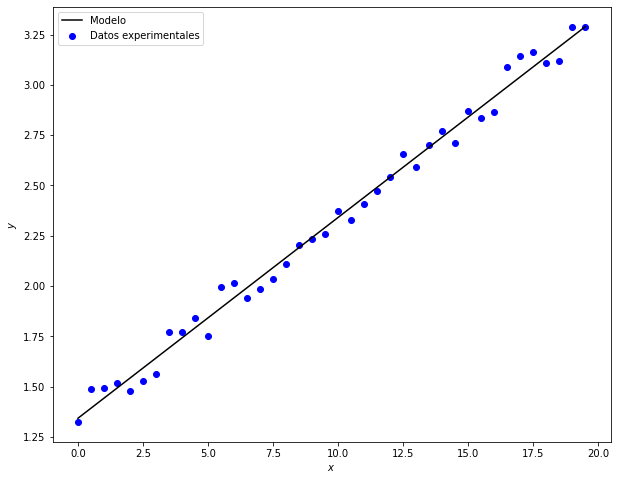

In [53]:
plt.figure(figsize=(10,8))
plt.scatter(x,y,label='data', color='blue')
plt.plot(x,prediccion_entrenamiento, "k-")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.legend(("Modelo",'Datos experimentales'))
plt.show()

**Otro ejemplo**: Regresión múltiple

Se desea predecir la emisión de $\mathrm{CO_2}$ de un automóvil en función del tamaño del motor, pero con la regresión múltiple se puede incluir más variables, como el peso del automóvil, para hacer la predicción más precisa.

In [54]:
import pandas as pd

In [55]:
df = pd.read_csv("https://raw.githubusercontent.com/css-umar/Metodos-Numericos/master/cars.csv")

In [56]:
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [57]:
df.tail()

,Car,Model,Volume,Weight,CO2
31,Volvo,XC70,2000,1746,117
32,Ford,B-Max,1600,1235,104
33,BMW,216,1600,1390,108
34,Opel,Zafira,1600,1405,109
35,Mercedes,SLK,2500,1395,120


In [58]:
X = df[["Weight","Volume"]]
y = df["CO2"]

In [59]:
X.head()

,Weight,Volume
0,790,1000
1,1160,1200
2,929,1000
3,865,900
4,1140,1500


## Aplicando la regresión

In [60]:
regresion_lineal_CO2 = LinearRegression()
regresion_lineal_CO2.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Validando 

In [61]:
r2 = regresion_lineal_CO2.score(X,y)
r2

0.37655640436199855

## Prediciendo la generación de $\mathrm{CO_2}$

Para un coche que pesa $2300\,\mathrm{kg}$ y un volumen de $1300\,\mathrm{cm^3}$

In [62]:
predicCO2 = regresion_lineal_CO2.predict([[2300, 1300]])
predicCO2

array([107.2087328])